# Proyecto 1 - Procesamiento Adaptativo de Señales
# Detección de arritmias

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import wfdb

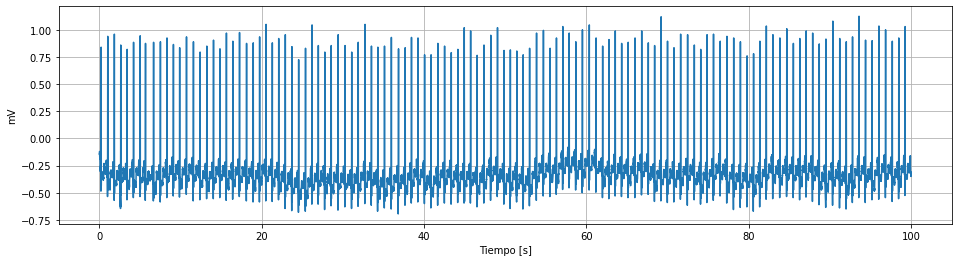

In [143]:
N = 36000

record, record_data = wfdb.rdsamp('mit-bih-arrhythmia-database-1.0.0/100', sampto=N)
annotation = wfdb.rdann('mit-bih-arrhythmia-database-1.0.0/100', 'atr', sampto=N)

fs = record_data['fs']
channel1 = record[:,0].reshape((N, 1))
channel2 = record[:,1].reshape((N, 1))
time = np.arange(0, len(channel1)/fs, 1/fs)

plt.figure(figsize=(16, 4))
plt.plot(time, channel1)
plt.xlabel('Tiempo [s]')
plt.ylabel(record_data['units'][0])
plt.grid()
plt.show()

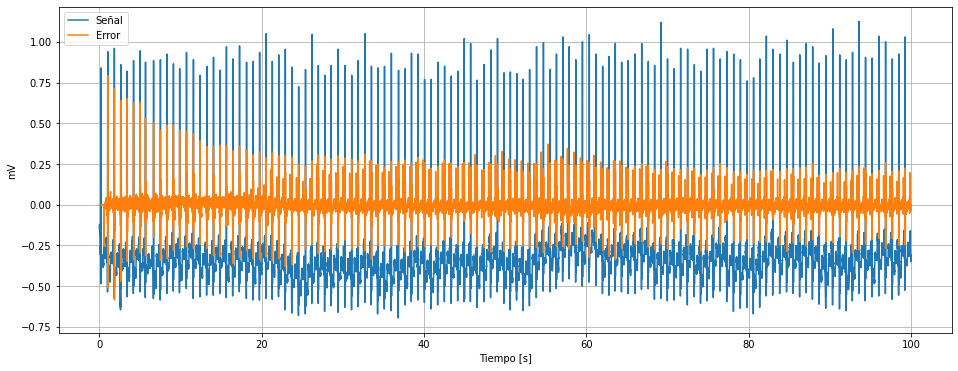

In [153]:
M = 200
w = np.zeros((M, 1))    # el vector queda en el orden inverso al tradicional
e = np.zeros(N)
mu = 1e-2

for i in range(M, N):
    x = channel1[i-M : i]
    y = channel1[i]
    e[i] = y - (w.T @ x).item(0)
    w = np.add(w, mu * e[i] * x)


plt.figure(figsize=(16, 4))
plt.plot(time, channel1, label = 'Señal')
plt.plot(time, e, label = 'Error')
plt.xlabel('Tiempo [s]')
plt.ylabel(record_data['units'][0])
plt.grid()
plt.legend()
plt.show()

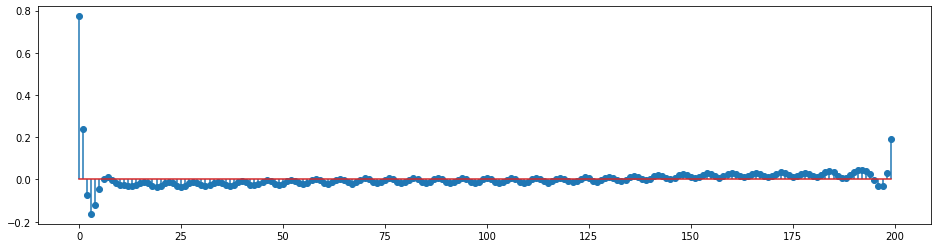

In [150]:
plt.figure(figsize=(16, 4))
plt.stem(np.flip(w))
plt.show()